In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as U
from astropy import constants as const
from astropy.coordinates import SkyCoord
import astropy.units as U

In [38]:
observation_metadata = pd.read_csv('all_alma_data.csv')
observation_metadata = observation_metadata[['s_resolution', 't_exptime', 'em_min', 
                        'em_max', 'em_resolution', 'spatial_resolution', 'bandwidth', 
                        'frequency', 'frequency_support', 'velocity_resolution', 'sensitivity_10kms', 
                        'cont_sensitivity_bandwidth', 'scan_intent', 's_ra', 's_dec']]
observation_metadata = observation_metadata[(observation_metadata['scan_intent'] == 'TARGET') &
                                            (observation_metadata['s_resolution'] == observation_metadata['spatial_resolution'])]
observation_metadata = observation_metadata.drop(columns=['s_resolution'])     
observation_metadata = observation_metadata[['spatial_resolution', 't_exptime', 'em_min','em_max', 'em_resolution', 
            'bandwidth', 'frequency', 'frequency_support', 'velocity_resolution', 's_ra', 's_dec']]
observation_metadata['velocity_resolution'] = observation_metadata['velocity_resolution'] * 10**(-3)

observation_metadata = observation_metadata.rename(columns={'spatial_resolution': 'spatial_resolution [arcsec]',
                                                            't_exptime': 'integration_time [s]',
                                                            'em_resolution': 'frequency_resolution [m]',
                                                            'bandwidth': 'bandwidth [GHz]',
                                                            'frequency': 'frequency [Ghz]',
                                                            'velocity_resolution': 'velocity_resolution [Km/s]',
                                                            'em_min': 'frequency_min [m]', 'em_max': 'frequency_max [m]'})
freq_sup = observation_metadata['frequency_support'].values
bandwidth = observation_metadata['bandwidth [GHz]'].values
freq_res = [int(float(f.split(',')[1][:-3]))* 10 ** (-3)  for f in freq_sup]




observation_metadata.info()

coords = SkyCoord(ra=observation_metadata['s_ra'], dec=observation_metadata['s_dec'], unit='deg').to_string('hmsdms')
b = 'J2000 '
coords = [b + i for i in coords]
observation_dist = observation_metadata[['spatial_resolution [arcsec]', 'integration_time [s]', 'velocity_resolution [Km/s]']]
observation_dist['J2000 coordinates'] = coords
observation_dist['frequency_resolution [MHz]'] = freq_res
print(observation_dist.info())
observation_dist.to_csv('obs_configurations.csv', index=False)

/var/folders/66/76q50s015tq8wc5qz1pvg7y40000gn/T/ipykernel_5354/1346356672.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  observation_metadata = pd.read_csv('all_alma_data.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32887 entries, 4 to 81998
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   spatial_resolution [arcsec]  32887 non-null  float64
 1   integration_time [s]         32887 non-null  float64
 2   frequency_min [m]            32887 non-null  float64
 3   frequency_max [m]            32887 non-null  float64
 4   frequency_resolution [m]     32887 non-null  float64
 5   bandwidth [GHz]              32887 non-null  float64
 6   frequency [Ghz]              32887 non-null  float64
 7   frequency_support            32887 non-null  object 
 8   velocity_resolution [Km/s]   32887 non-null  float64
 9   s_ra                         32887 non-null  float64
 10  s_dec                        32887 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32887 entries, 4 to 81998
Data col

/var/folders/66/76q50s015tq8wc5qz1pvg7y40000gn/T/ipykernel_5354/1346356672.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observation_dist['J2000 coordinates'] = coords
/var/folders/66/76q50s015tq8wc5qz1pvg7y40000gn/T/ipykernel_5354/1346356672.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observation_dist['frequency_resolution [MHz]'] = freq_res


In [2]:
obs_params = pd.read_csv('obs_configurations.csv')
obs_params.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32887 entries, 0 to 32886
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   spatial_resolution [arcsec]  32887 non-null  float64
 1   integration_time [s]         32887 non-null  float64
 2   velocity_resolution [Km/s]   32887 non-null  float64
 3   J2000 coordinates            32887 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


(array([19748.,     0., 12750.,     0.,   365.,     0.,     0.,     0.,
            0.,    24.]),
 array([3.00000e-02, 1.25270e+01, 2.50240e+01, 3.75210e+01, 5.00180e+01,
        6.25150e+01, 7.50120e+01, 8.75090e+01, 1.00006e+02, 1.12503e+02,
        1.25000e+02]),
 <BarContainer object of 10 artists>)

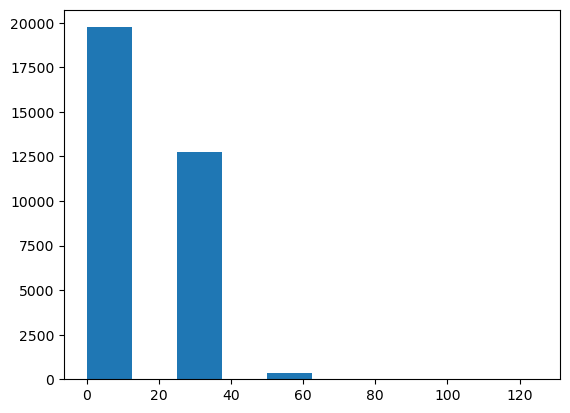

In [36]:

plt.hist(freq_res)

In [45]:
observation_dist['s_ra'].values[:10]

array([  1.231     , 159.42766667, 159.42766667, 159.42766667,
       159.42766667,   1.231     ,   1.231     ,   1.231     ,
       158.52779167, 159.72968417])

In [39]:
c = const.c.to(U.km / U.s).value
print(c)
restfreq = 1.420405752
restvel = c * ((restfreq - observation_metadata['frequency [GHz]']) / restfreq)
observation_metadata['restvel'] = restvel

299792.458


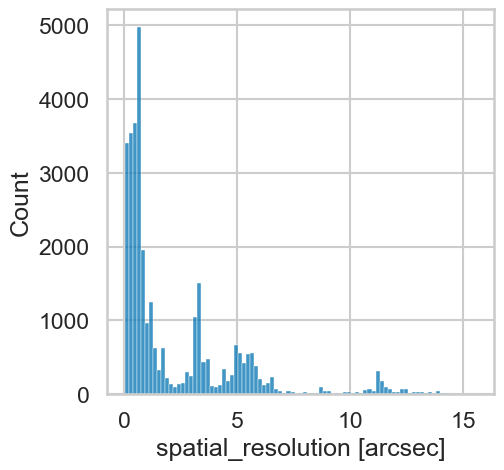

2.2315971193818536 2.7727402081910966


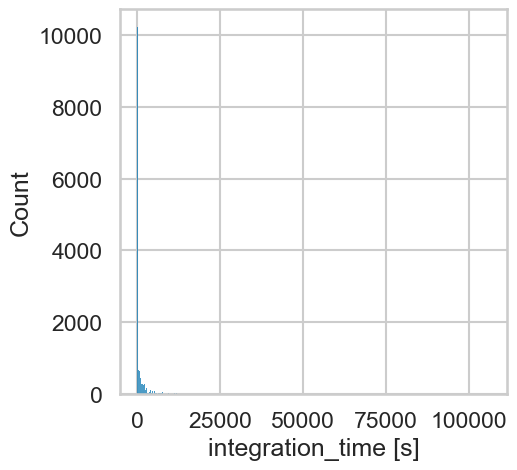

1303.1263158694924 3131.160879691525


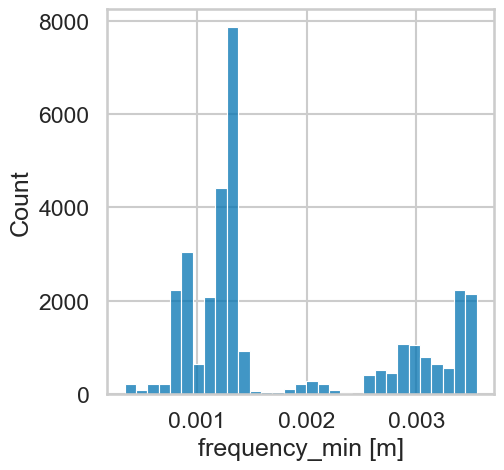

0.001785281131240797 0.000954412968195935


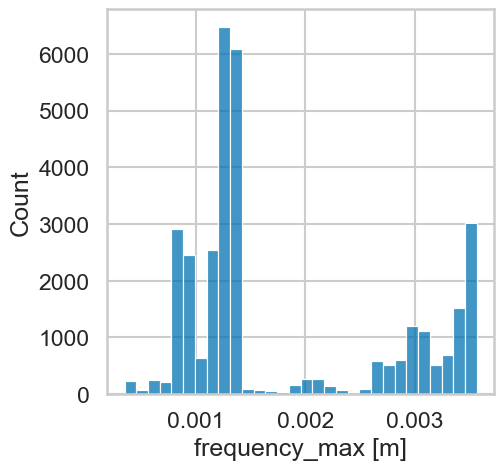

0.0018028760567277043 0.0009705857072430273


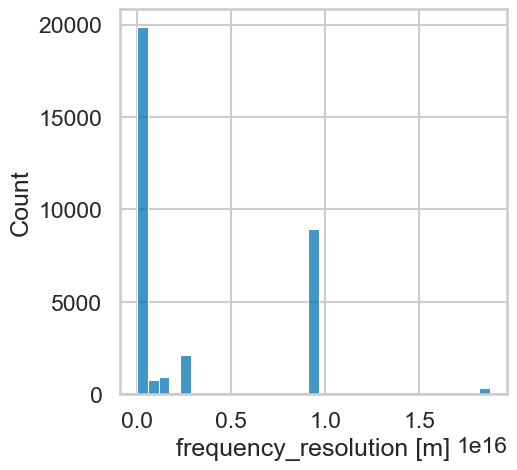

2986842585017400.5 4308124843976380.5


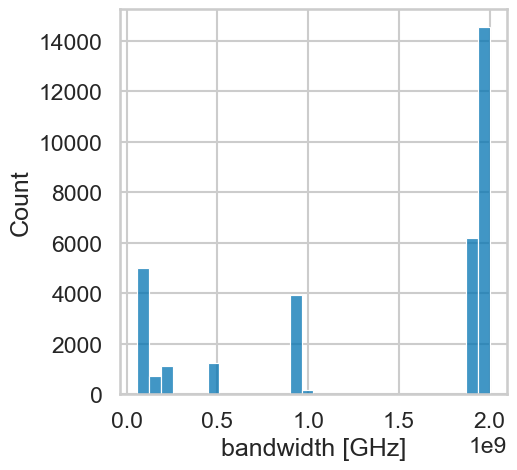

1392888194.8034177 780348759.9170649


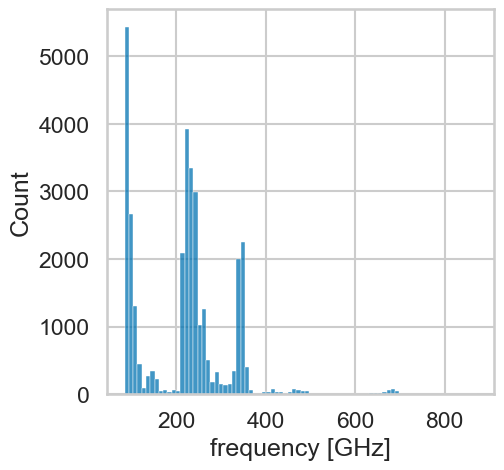

215.535400668723 101.80871305817091


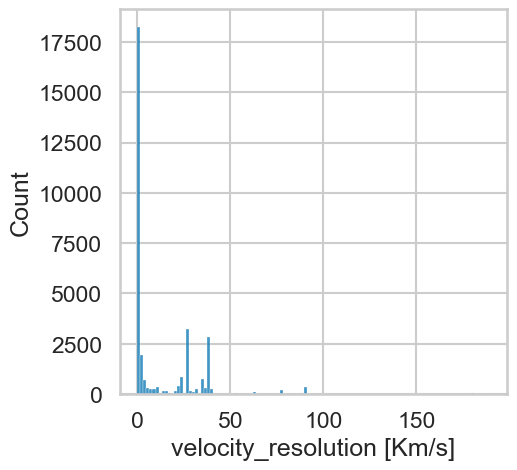

12.642807033520837 19.648358850129807


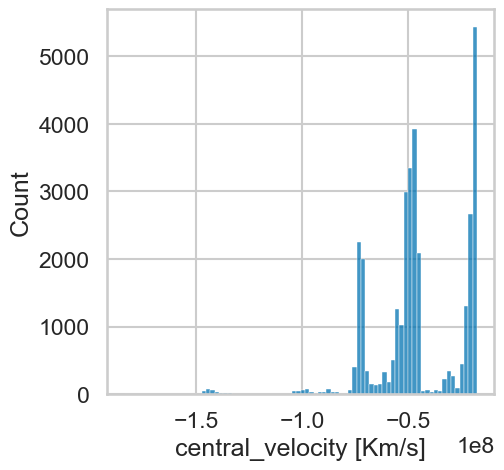

-45191355.02680075 21487863.091619972


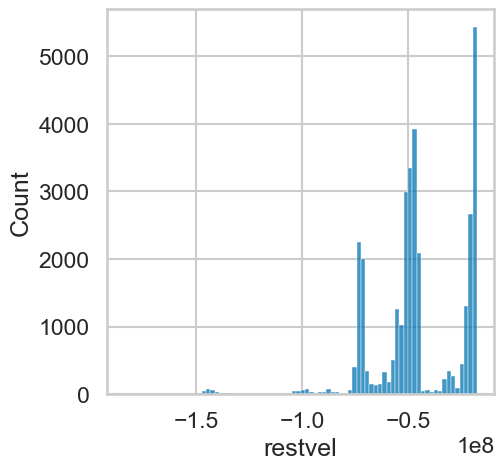

-45191355.02680076 21487863.09161997


In [40]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('colorblind')


for column in observation_metadata.columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.histplot(x=column, data=observation_metadata, kde=False, ax=ax)
    plt.show()
    print(np.mean(observation_metadata[column]), np.std(observation_metadata[column]))
